Karen Fukuda

Updated 12.10.2023

This code is for plotting the full PL spectra with normalized intensity. It uses a number of sub functions for the final function, which can plot the full PL spectra from numerous compositions on the same graph. 

This code is helpful for dealing with data sets that have a separate file for each PL frame. For example, the (wavelength, intensity) data points taken for one frame(~400-900nm) is in one file. A typical data set will contain multiple of these csv files. For example, a full data set for a 10 minute PL performed on one composition will contain 20 csv or txt files (integration time 1000ms, 30s in between each measurement). 

Scroll down past helper functions to find the function that will help you plot your data. Examples are given below.

In [8]:
#Import necessary modules
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Composition Extracter 
This function takes a filepath and returns the composition name. The composition name is assumed to be the file name just without the trailing '.csv' or '.txt'. Possibly FIX so that it can be more flexible to other types of file names    

In [2]:
def composition_extracter(file_path):
    base_name = os.path.basename(file_path)
    
    # Split the base name into the filename and the extension
    filename, file_extension = os.path.splitext(base_name)
    
    # Return the filename without the extension
    return filename

#composition_extracter('/Users/Karen/Desktop/I2Br Final.csv') #test



### Max intensity finder
The below functions take a csv or txt file and extract the maximum intensity from them. Will be called in later functions to find normalized intensity.

In [3]:
def max_intensity_csv(file_path):
    # Works for CSV files
    max_intensity = 0  # Initiate variable for maximum intensity
    with open(file_path, 'r', newline='') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')  # Specify the delimiter for CSV files
        
        for row in csv_reader:  # Loop through each row in the CSV file to find max intensity
            intensity = float(row[1])  # Extract intensity from the row and convert to float
            if intensity > max_intensity:  # Condition for redefining maximum intensity var, allows us to 
                max_intensity = intensity  # eventually find the largest intensity value in the file

    return max_intensity  # Return final maximum intensity

                  
        
#max_intensity_csv('/Users/Karen/Desktop/I2Br Final.csv') #test

In [5]:
def max_intensity_txt(file_path):
    #works for TXT files
    max_intensity = 0 #initiate variable for maximum intensity
    with open(file_path, 'r') as text_file:
        lines = text_file.readlines() #create a list of str, each str is a line in the file
        for line in lines: #loop through each line in the file
            columns = line.strip().split('\t') #split into 2 str, one for each column and save resulting list in var
            intensity = float(columns[1]) #define variable for intensity and convert to integer
            if intensity > max_intensity: #condition for redefining maximum intensity var
                max_intensity = intensity
        return max_intensity #return final maximum intensity

### Process file 

The below code takes a csv or txt file (one frame in the full PL measurement) and plots the full spectra of wavelengths (~400-900nm). This is helpful when you want to plot a specific frame in the PL measurement, for example to find initial or final band gap. 

Below is an example of a graph produced by this code:

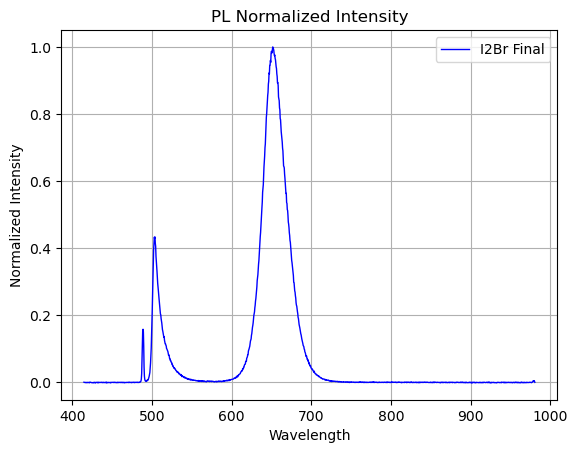

In [7]:
def process_file_csv(file_path):
    #This function takes a txt file and plots the wavelength, norm_intensity coordinate for each 
    #row in the csv file, allowing us to plot the full PL spectra of this frame
    #works for txt files
    
    #Create a list to hold data points
    plotting_points = []
    
    #Find the max intensity value of this file to use when finding normalized intensity
    maximum_intensity = max_intensity_csv(file_path) 

    with open(file_path, 'r', newline='', encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',') 
        for row in csv_reader: 
            wavelength = float(row[0]) #define value for wavelength (must be float since contains decimals)
            intensity = int(row[1])    #define value for intensity
            norm_intensity = intensity/maximum_intensity #normalize the intensity value
            
            #Create tuple for the data point and append it to the large list of data points to be plotted
            coordinate = (wavelength,norm_intensity)
            plotting_points.append(coordinate)
                    
            
    #Extract x and y values for plotting
    x_values, y_values = zip(*plotting_points) #creates two new lists
    
    #Extract file name 
    file_name = composition_extracter(file_path)
    
    #Plot data
    plt.plot(x_values, y_values, color='blue', linewidth=1, markersize=5, label=file_name)
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Intensity')
    plt.title('PL Normalized Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()
    
#process_file_csv('/Users/Karen/Desktop/I2Br Final.csv') test

In [6]:
def process_file_txt(file_path):
    #This function takes a txt file and extracts the wavelength, norm_intensity coordinate for each 
    #row in the csv file, allowing us to plot the full PL spectra of this frame

    #Create a list to hold data points
    plotting_points = []
    
    #Find the max intensity value of this file to use when finding normalized intensity
    maximum_intensity = max_intensity_txt(file_path) 
    
    with open (file_path, 'r') as text_file:
        lines = text_file.readlines() #read each line from file and save as a list of strings
        for line in lines:            #loop through each line in the file
            columns = line.strip().split('\t') #split line into 2 strings, one for each column, gives a list. 
            wavelength = float(columns[0]) #define value for wavelength (must be float since contains decimals)
            intensity = int(columns[1])    #define value for intensity
            norm_intensity = intensity/maximum_intensity #normalize the intensity value
            
            #Create tuple for the data point and append it to the large list of data points to be plotted
            coordinate = (wavelength,norm_intensity)
            plotting_points.append(coordinate)


    #Extract x and y values for plotting
    x_values, y_values = zip(*plotting_points) #creates two new lists
    
    #Extract file name by calling earlier function
    file_name = composition_extracter(file_path)
    
    #Plot data
    plt.plot(x_values, y_values, color='blue', linewidth=1, markersize=5, label=file_name)
    
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Intensity')
    plt.title('PL Normalized Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()
    #process_file('/Users/Karen/Desktop/K7, K8 Normalized/Initial/0% Cl + 40% Br_initial.txt') #test


### Process Files 
The following function takes a list of csv or txt files and plots the full PL spectra for each file on the same graph. This is helpful to compare the band gaps from the initial/final frames (or other time stamp) from different compositions, or to track how the band gap of one composition changes over time. Remember that each file represents a different frame (for example, "picture" taken at 1 minute, etc.). 

The graphs below illustrate possible uses of this code:

1st graph - Plotting full PL spectra for an I2Br composition to track its band gap over 5 minutes.
2nd graph - Comparing initial band gaps of different compositions. 

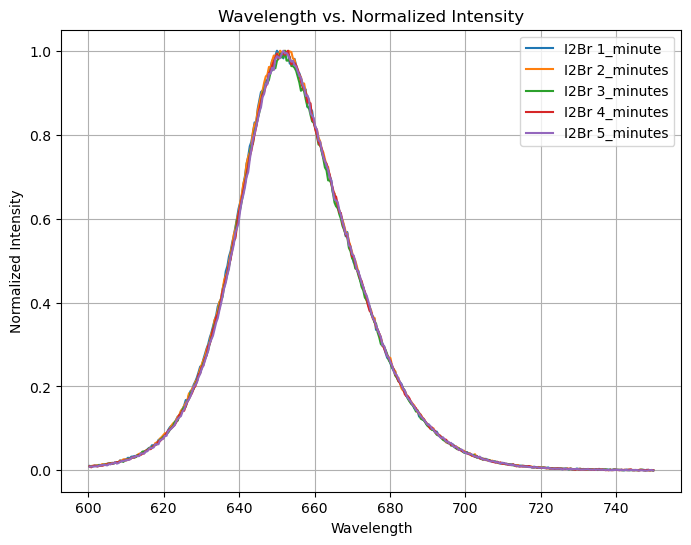

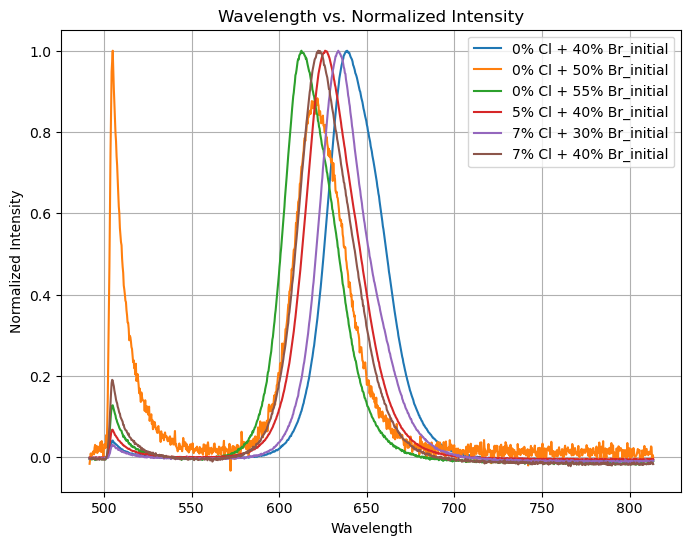

In [9]:
def process_files_csv(file_paths):
    #Takes a list of csv file paths and plots norm. int. on one graph
    
    #Create a new figure for the graph
    plt.figure(figsize=(8,6)) 
    
    
    for file_path in file_paths: #Loop through each file in the list of files 
        
        #Create a list to hold data points to be plotted later 
        plotting_points = []
        
        #Find the max intensity of this file to use in calculating normalized intensity
        maximum_intensity = max_intensity_csv(file_path) 
        
        #Plot the full PL spectra for this file. This will be repeated for each file in the given list of files. 
        with open(file_path, 'r', newline='', encoding='utf-8-sig') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',') 
            for row in csv_reader: 
                wavelength = float(row[0]) #define value for wavelength (must be float since contains decimals)
                intensity = int(row[1])    #define value for intensity
                norm_intensity = intensity/maximum_intensity #normalize the intensity value
                coordinate = (wavelength,norm_intensity)
                plotting_points.append(coordinate)
                    
         #Extract x and y values for plotting
        x_values, y_values = zip(*plotting_points) #creates two new lists
        
         #Extract file name 
        file_name = composition_extracter(file_path)
    
        #Plot the data from this file, then loop back to repeat the process for the next file in the list.
        plt.plot(x_values, y_values, label=file_name)
    
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Intensity')
    plt.title('Wavelength vs. Normalized Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    

In [10]:
def process_files_txt(file_paths):
    #Takes a list of txt file paths and plots norm. int. on one graph
   
    #Create a new figure for the graph
    plt.figure(figsize=(8,6)) 
    
    for file_path in file_paths: #Loop through each file in the list of files
       
        #Create a list to hold data points to be plotted later 
        plotting_points = []
        
        #Find the max intensity of this file to use in calculating normalized intensity
        maximum_intensity = max_intensity_txt(file_path) 
        
        
        
        #Plot the full PL spectra for this file. This will be repeated for each file in the given list of files.
        with open (file_path, 'r') as text_file:
            lines = text_file.readlines() #read each line from file and save as a list of strings
            for line in lines:            #loop through each line in the file
                columns = line.strip().split('\t') #split line into 2 strings, one for each column, gives a list. 
                wavelength = float(columns[0]) #define value for wavelength (must be float since contains decimals)
                intensity = int(columns[1])    #define value for intensity
                norm_intensity = intensity/maximum_intensity #normalize the intensity value
                coordinate = (wavelength,norm_intensity)
                plotting_points.append(coordinate)
                    
         #Extract x and y values for plotting
        x_values, y_values = zip(*plotting_points) #creates two new lists
        
         #Extract file name 
        file_name = composition_extracter(file_path)
    
        #Plot the data from this file, then loop back to repeat the process for the next file in the list.
        plt.plot(x_values, y_values, label=file_name)
    
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Intensity')
    plt.title('Wavelength vs. Normalized Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    

In [11]:
#This function does the same as above, but puts a restriction on the graph so it can have a scaled view 
#In this case the 'zoomed in' frame is from 600 to 750nm

#Can be repeated to make similar function to deal with txt files
def process_files_csv_restriction(file_paths):
    #Takes a list of csv file paths and plots norm. int. on one graph, restricted from 550-750nm wavelength
    plt.figure(figsize=(8,6)) #Create a new figure for the graph
    
    for file_path in file_paths:
        plotting_points = []
        maximum_intensity = max_intensity_csv(file_path) #find the max intensity of this file
        with open(file_path, 'r', newline='', encoding='utf-8-sig') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',') 
            for row in csv_reader: 
                wavelength = float(row[0]) #define value for wavelength (must be float since contains decimals)
                if wavelength >= 600 and wavelength <= 750: #change values as needed for desired graph scale
                    intensity = int(row[1])    #define value for intensity
                    norm_intensity = intensity/maximum_intensity #normalize the intensity value
                    coordinate = (wavelength,norm_intensity)
                    plotting_points.append(coordinate)
                    
         #Extract x and y values for plotting
        x_values, y_values = zip(*plotting_points) #creates two new lists
        
         #Extract file name 
        file_name = composition_extracter(file_path)
    
        plt.plot(x_values, y_values, label=file_name)
    
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Intensity')
    plt.title('Wavelength vs. Normalized Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    

### Example usage

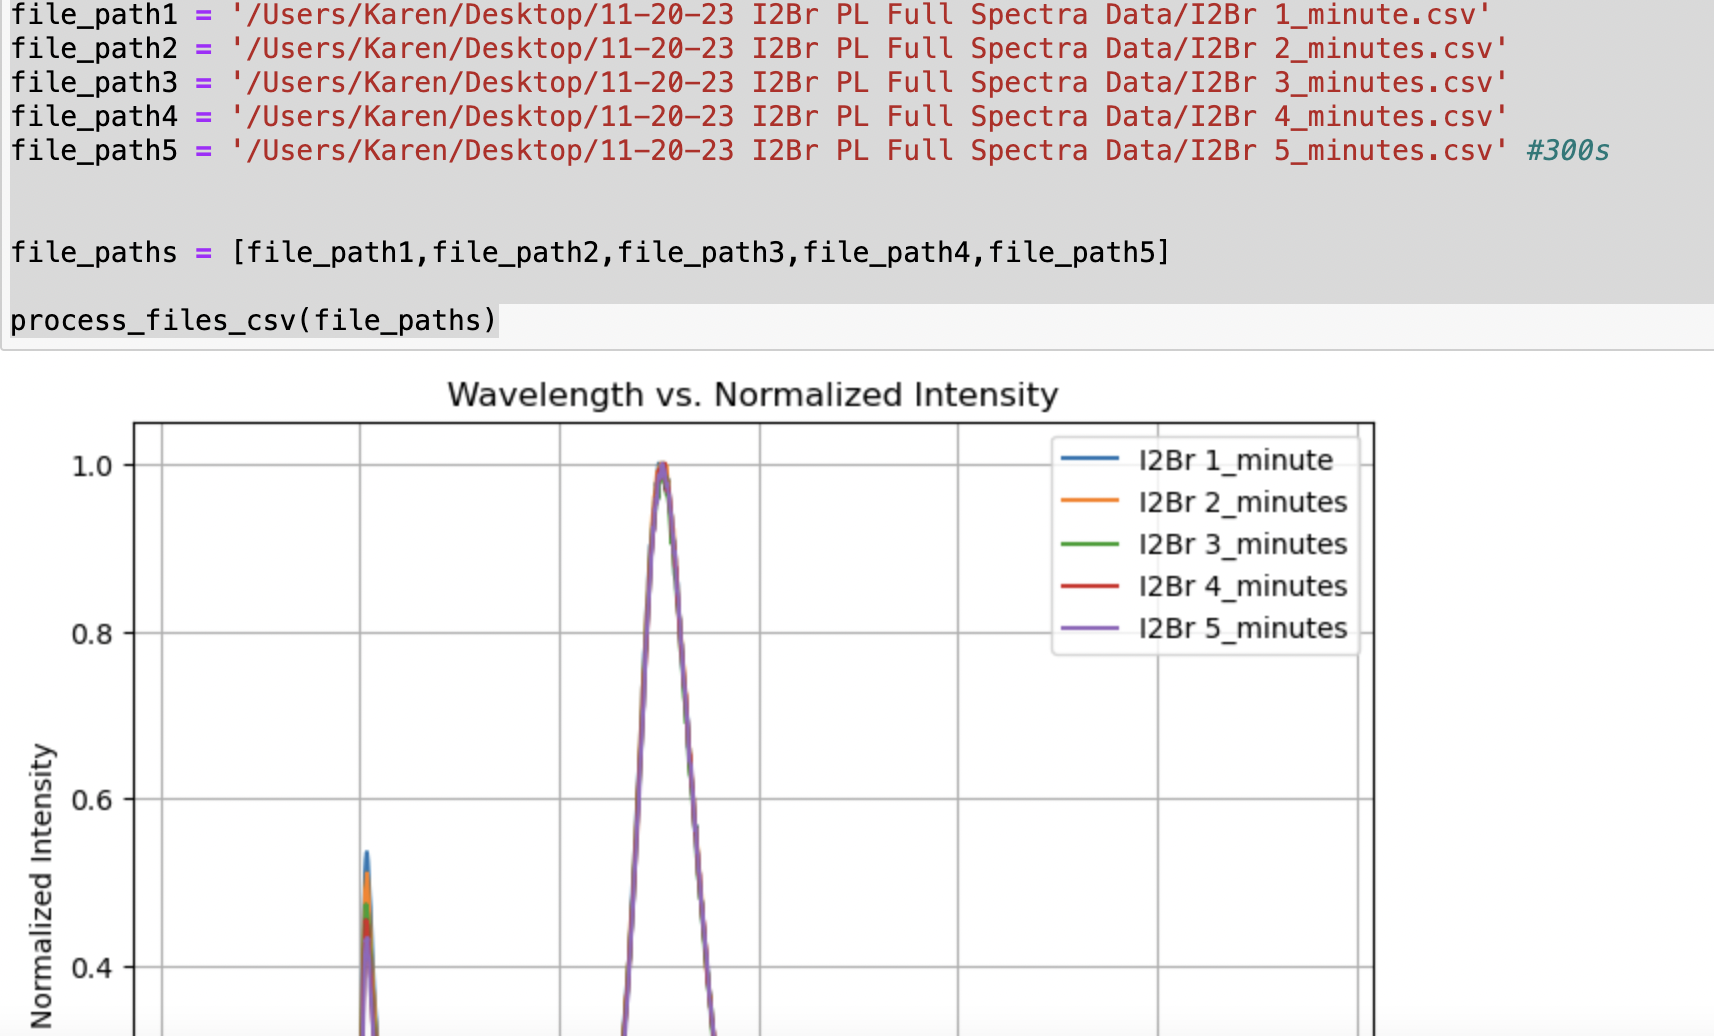